<a href="https://colab.research.google.com/github/athriyagenferin/PVCK/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 6 - Histogram, Histogram Equalization, Dithering**

---



Tugas Praktikum
Import folder drive

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Import library

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

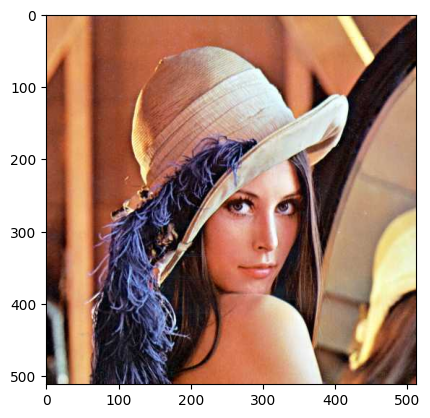

In [10]:
# Langkah 1 - Input Image
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
lena = cv.cvtColor(original, cv.COLOR_BGR2RGB)

plt.imshow(lena)

[[ 816.]
 [ 230.]
 [ 178.]
 [ 305.]
 [ 314.]
 [ 282.]
 [ 405.]
 [ 389.]
 [ 415.]
 [ 443.]
 [ 505.]
 [ 517.]
 [ 543.]
 [ 628.]
 [ 694.]
 [ 739.]
 [ 745.]
 [ 774.]
 [ 866.]
 [ 866.]
 [ 918.]
 [1009.]
 [1029.]
 [1084.]
 [1085.]
 [1173.]
 [1165.]
 [1255.]
 [1218.]
 [1197.]
 [1129.]
 [1219.]
 [1193.]
 [1129.]
 [1142.]
 [1123.]
 [1113.]
 [1101.]
 [1058.]
 [1032.]
 [ 942.]
 [ 887.]
 [ 822.]
 [ 811.]
 [ 740.]
 [ 709.]
 [ 692.]
 [ 709.]
 [ 649.]
 [ 595.]
 [ 593.]
 [ 592.]
 [ 522.]
 [ 563.]
 [ 501.]
 [ 512.]
 [ 513.]
 [ 510.]
 [ 503.]
 [ 476.]
 [ 464.]
 [ 423.]
 [ 415.]
 [ 404.]
 [ 422.]
 [ 395.]
 [ 421.]
 [ 410.]
 [ 413.]
 [ 383.]
 [ 429.]
 [ 393.]
 [ 397.]
 [ 401.]
 [ 398.]
 [ 431.]
 [ 389.]
 [ 440.]
 [ 416.]
 [ 403.]
 [ 457.]
 [ 399.]
 [ 473.]
 [ 399.]
 [ 405.]
 [ 447.]
 [ 427.]
 [ 451.]
 [ 421.]
 [ 474.]
 [ 454.]
 [ 454.]
 [ 477.]
 [ 426.]
 [ 442.]
 [ 449.]
 [ 482.]
 [ 477.]
 [ 509.]
 [ 498.]
 [ 491.]
 [ 525.]
 [ 522.]
 [ 534.]
 [ 516.]
 [ 524.]
 [ 544.]
 [ 521.]
 [ 523.]
 [ 529.]
 [ 517.]
 

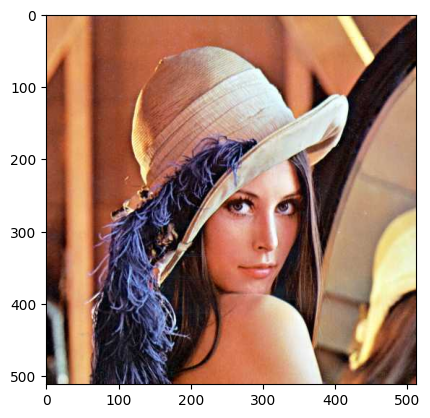

In [11]:
# Langkah 2 - Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada

# cv.calcHist() adalah fungsi OpenCV yang digunakan untuk menghitung histogram dari gambar.

hist = cv.calcHist([lena], [0], None, [256], [0, 256])  # ([image], [channels], mask, [histSize], [ranges])
total_pixels = lena.shape[0] * lena.shape[1]
color_count = np.sum(hist)

print(hist, "\n")
print("Jumlah kemunculan setiap pixel warna: \f", color_count, "\n")
plt.imshow(lena)

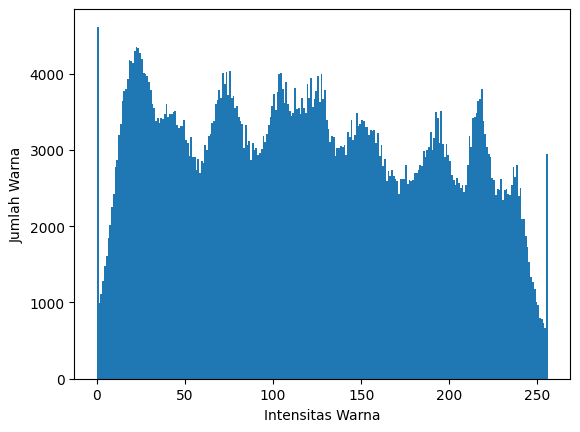

In [12]:
# Langkah 3 - Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan warna

# plt.hist() adalah fungsi Matplotlib yang digunakan untuk menghitung dan menampilkan histogram dari data.

plt.hist(lena.ravel(), 256, [0, 256]) # (image.ravel(), bins, [range], density, color)
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Warna')
plt.show()

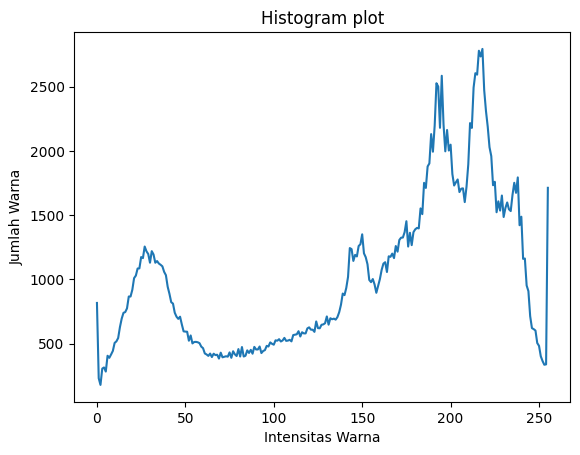

In [13]:
# Langkah 4 - Histogram Citra

plt.plot(hist)

# Plot title dan axis label
plt.title('Histogram plot')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Warna')

# hasil
plt.show()

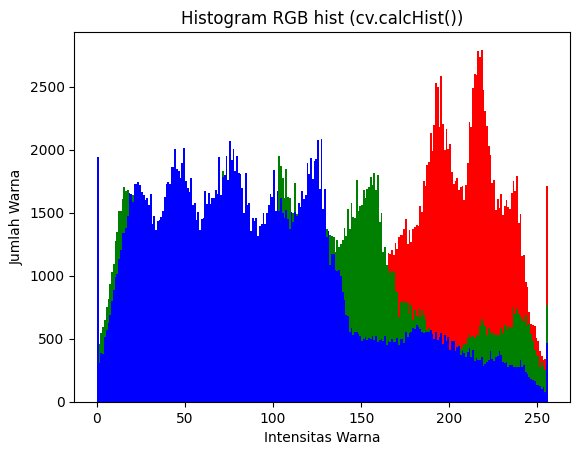

In [14]:
# Hitogram RGB

# Split RGB channels
r, g, b = cv.split(lena)

# Plot histogram per channel
plt.hist(r.ravel(), 256, [0, 256], color='red')   # (image.ravel(), bins, [range], density, color)
plt.hist(g.ravel(), 256, [0, 256], color='green')
plt.hist(b.ravel(), 256, [0, 256], color='blue')

# Plot title dan axis label
plt.title('Histogram RGB hist (cv.calcHist())')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Warna')

# hasil
plt.show()

4. Histogram Citra dengan library dari NumPy

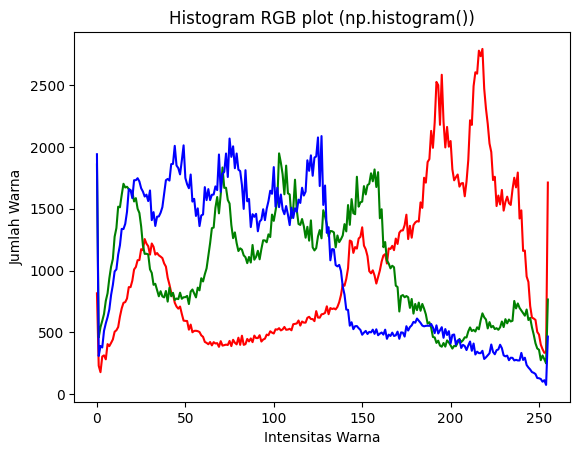

In [15]:
# Split image into RGB channels
r, g, b = cv.split(lena)

# np.histogram() adalah fungsi NumPy yang digunakan untuk menghitung histogram dari data.

# Calculate histograms for each channel using NumPy
r_hist = np.histogram(r.ravel(), 256, [0, 256])   # (image.ravel(), bins, [range])
g_hist = np.histogram(g.ravel(), 256, [0, 256])
b_hist = np.histogram(b.ravel(), 256, [0, 256])

# Plot histograms for each channel
plt.plot(r_hist[1][:-1], r_hist[0], color='red')  # juga bisa dengan bar
plt.plot(g_hist[1][:-1], g_hist[0], color='green')
plt.plot(b_hist[1][:-1], b_hist[0], color='blue')

# Set plot title and axis labels
plt.title('Histogram RGB plot (np.histogram())')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Warna')

# Show the plot
plt.show()

Output dari nomer 3 (menggunakan cv.calcHist()) dan output dari nomer 4 (menggunakan np.histogram()) menghasilkan histogram yang sama.

5. Histogram Equalization

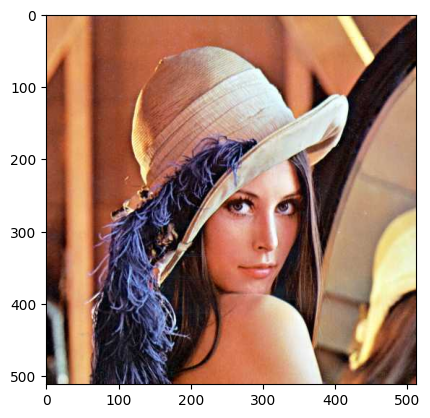

In [17]:
# Load Image
lc_original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
lena_lc = cv.cvtColor(lc_original, cv.COLOR_BGR2RGB)

plt.imshow(lena_lc)

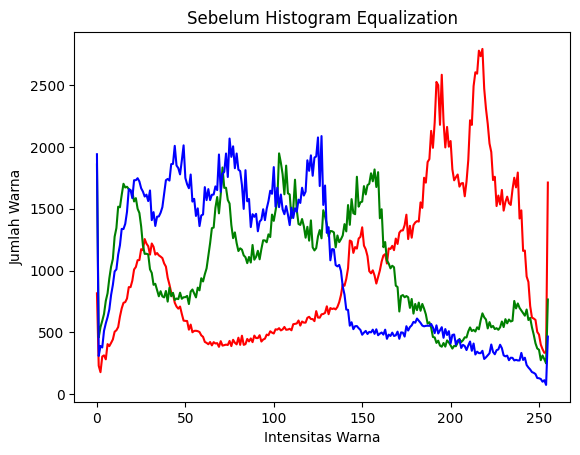

In [18]:
# Split image into RGB channels
r, g, b = cv.split(lena_lc)

# np.histogram() adalah fungsi NumPy yang digunakan untuk menghitung histogram dari data.

# Calculate histograms for each channel using NumPy
r_hist = np.histogram(r.ravel(), 256, [0, 256])   # (image.ravel(), bins, [range])
g_hist = np.histogram(g.ravel(), 256, [0, 256])
b_hist = np.histogram(b.ravel(), 256, [0, 256])

# Plot histograms for each channel
plt.plot(r_hist[1][:-1], r_hist[0], color='red')  # juga bisa dengan bar
plt.plot(g_hist[1][:-1], g_hist[0], color='green')
plt.plot(b_hist[1][:-1], b_hist[0], color='blue')

# Set plot title and axis labels
# plt.title('Histogram RGB plot (np.histogram())')
plt.title('Sebelum Histogram Equalization')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Warna')

# Show the plot
plt.show()

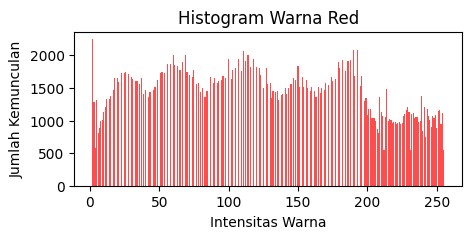

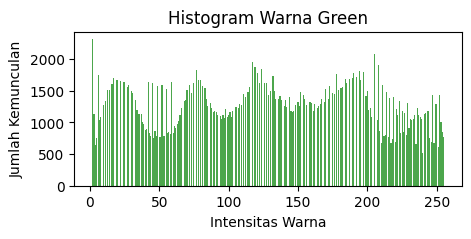

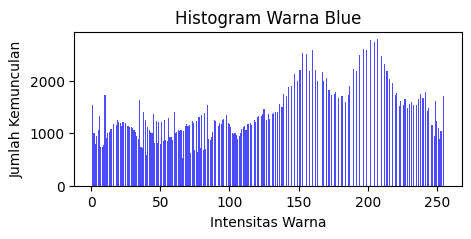

In [19]:
def pixel(image):
  red = {}
  green = {}
  blue = {}

  # Akses per pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      b = int(image[y, x, 0])
      g = int(image[y, x, 1])
      r = int(image[y, x, 2])

      if r in red:
        red[r] += 1
      else:
        red[r] = 1

      if g in green:
        green[g] += 1
      else:
        green[g] = 1

      if b in blue:
        blue[b] += 1
      else:
        blue[b] = 1

  return red, green, blue

def histogram(intensitas, warna):
  plt.figure(figsize=(5, 2))
  plt.bar(intensitas.keys(), intensitas.values(), color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

def histogram_equalization(image):

  # Intensitas Pixel
  intensitas_merah, intensitas_hijau, intensitas_biru = pixel(image)

  red_channel = hitung_sk(image[...,2], intensitas_merah)
  green_channel = hitung_sk(image[...,1], intensitas_hijau)
  blue_channel = hitung_sk(image[...,0], intensitas_biru)

  merged_image = cv.merge([blue_channel, green_channel, red_channel])

  return merged_image

def hitung_sk(image, list_intensitas):
  list_intensitas = dict(sorted(list_intensitas.items()))

  # l, rj dan nrj
  l = 256
  rj = list(list_intensitas.keys())
  nrj = list(list_intensitas.values())

  # K0
  k0 = []
  for i in range(len(rj)):
    if i == 0:
      k0.append(nrj[i])
    else:
      k0.append(nrj[i] + k0[i - 1])

  # Sk = round((L-1)/MAX(k0) * k0)
  sk = []
  list_pixel_baru = {}
  for i in range(len(rj)):
    k0s = (l - 1) / k0[-1] * k0[i]
    sk.append(round(k0s))

    list_pixel_baru[rj[i]] = sk[i]

  # Konversi nilai pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      image[y, x] = list_pixel_baru[image[y, x]]

  return image

img3 = np.copy(lena_lc)
equalized_img = histogram_equalization(img3)

# Sesudah histogram equalization
intensitas_merah, intensitas_hijau, intensitas_biru = pixel(equalized_img)
histogram(intensitas_merah, 'red')
histogram(intensitas_hijau, 'green')
histogram(intensitas_biru, 'blue')

6. Histogram Equalization (Library CV2 EqualizeHist)

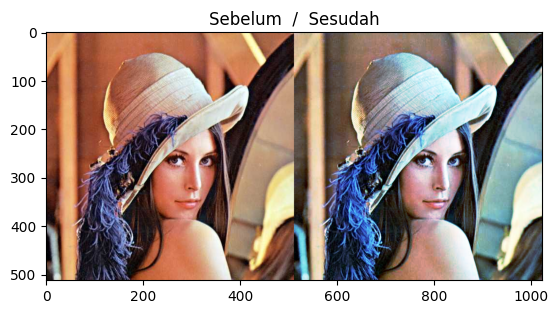

In [20]:
def use_equlizeHist(image):
  # Histogram Equalization setiap channel warna

  # cv.EqualizeHist adalah sebuah fungsi pada OpenCV yang digunakan untuk melakukan histogram equalization pada citra.

  b, g, r = cv.split(lena)
  b_eq = cv.equalizeHist(b)
  g_eq = cv.equalizeHist(g)
  r_eq = cv.equalizeHist(r)

  # Merge Channel Warna
  img_eq = cv.merge((b_eq, g_eq, r_eq))

  return img_eq

equalized_img = use_equlizeHist(lena_lc)
final_frame = cv.hconcat((lena_lc, equalized_img))
plt.imshow(final_frame)
plt.title('Sebelum  /  Sesudah')
plt.show()


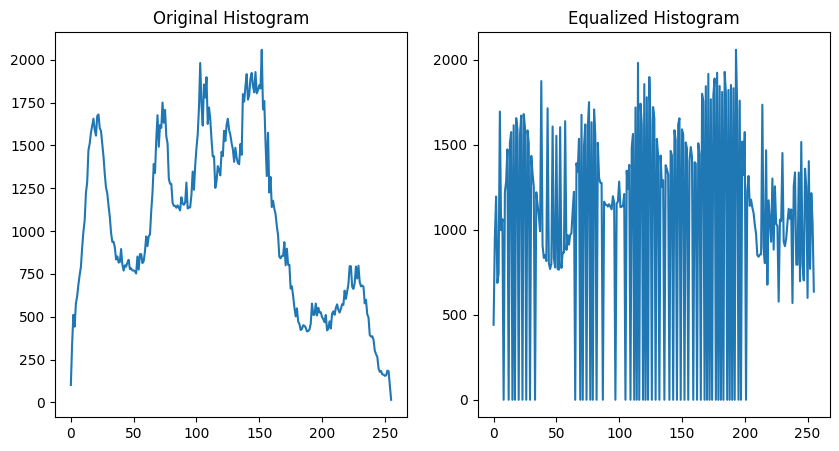

In [21]:
# Convert image to grayscale
gray = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)

# Perform histogram equalization using OpenCV
equ = cv.equalizeHist(gray)

# Calculate histograms for original and equalized images
hist_orig = cv.calcHist([gray], [0], None, [256], [0, 256])
hist_eq = cv.calcHist([equ], [0], None, [256], [0, 256])

# Display the original and equalized images side by side
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# axs[0].imshow(cv.cvtColor(lena_lc, cv.COLOR_BGR2RGB))
# axs[0].set_title('Original Image')
# axs[1].imshow(equ, cmap='gray')
# axs[1].set_title('Equalized Image')

# Display the histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist_orig)
axs[0].set_title('Original Histogram')
axs[1].plot(hist_eq)
axs[1].set_title('Equalized Histogram')
plt.show()


7. Proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih.

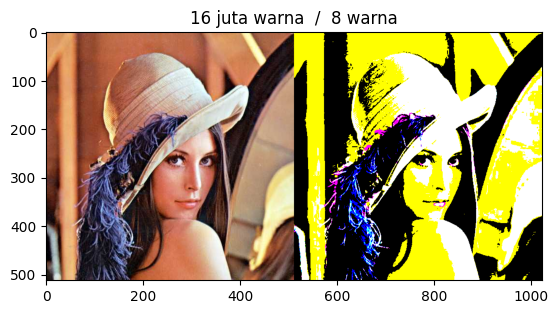

In [22]:

colors = {
    'hitam': (0, 0, 0),
    'hijau': (0, 255, 0),
    'kuning': (255, 255, 0),
    'biru': (0, 0, 255),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'putih': (255, 255, 255)
}

def cari_warna_terdekat(rgb_color):
    min_dist = float('inf')
    nearest_color = None
    for color, target_rgb in colors.items():
        dist = np.linalg.norm(np.array(rgb_color) - np.array(target_rgb))
        # dist = (np.sum((np.array((rgb_color) - np.array(target_rgb)) ** 2)))**0.5 # Eclidean Norm
        if dist < min_dist:
            min_dist = dist
            nearest_color = color
    return nearest_color

def ubah_warna(image):
  new_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel_color = tuple(image[y, x])
        nearest_color = cari_warna_terdekat(pixel_color)
        new_image[y, x] = colors[nearest_color]

  return new_image

new_image = ubah_warna(lena)

final_frame = cv.hconcat((lena, new_image))
plt.imshow(final_frame)
plt.title('16 juta warna  /  8 warna')
plt.show()

8. Dithering Floyd and Steinberg

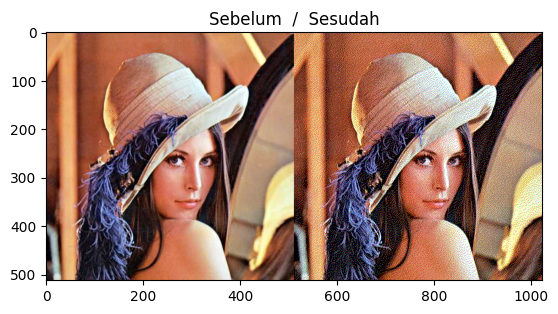

In [23]:
def floyd_steinberg_dithering(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  channel = image.shape[2]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      for c in range(channel):
        # Jarak pixel tetangga
        pixel_old = image[y, x, c]

        # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
        pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

        image[y, x, c] = pixel_new

        error = pixel_old - pixel_new

        # Lakukan untuk semua channel warna
        # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
        if x + 1 < lebar:
          image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7/16)
        if y + 1 < tinggi:
          if x - 1 >= 0:
            image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3/16)
          image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5/16)
          if x + 1 < lebar:
            image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1/16)

  return image

def threshold(nilai_warna):
  if nilai_warna > 255:
    nilai_warna = 255
  elif nilai_warna < 0:
    nilai_warna = 0

  return nilai_warna

img3 = np.copy(lena)

dithering_image = floyd_steinberg_dithering(img3)
final_frame = cv.hconcat((lena, dithering_image))
plt.imshow(final_frame)
plt.title('Sebelum  /  Sesudah')
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg.

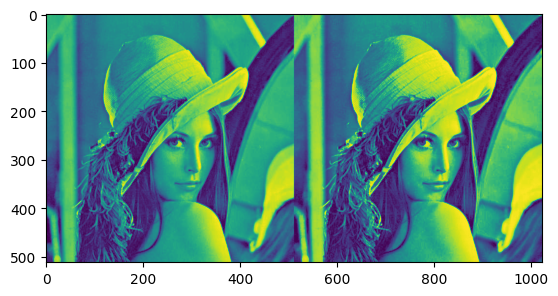

In [25]:
lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
lena_gray = cv.cvtColor(lena, cv.COLOR_BGR2GRAY)

lena_gray2 = np.copy(lena_gray)

equalized_img = cv.equalizeHist(lena_gray2)

final_frame = cv.hconcat((lena_gray, equalized_img))
plt.imshow(final_frame)

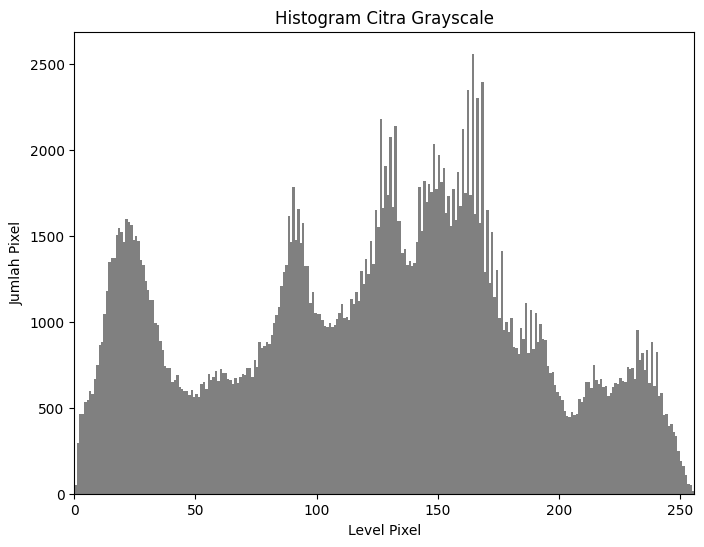

In [26]:
def histogram_gray(image_path):

    image = image_path

    # Hitung histogram menggunakan NumPy
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Tampilkan histogram
    plt.figure(figsize=(8, 6))
    plt.title('Histogram Citra Grayscale')
    plt.xlabel('Level Pixel')
    plt.ylabel('Jumlah Pixel')
    plt.hist(image.flatten(), 256, [0, 256], color='gray')
    plt.xlim([0, 256])
    plt.show()

# Sebelum Equalization
histogram_gray(lena_gray)

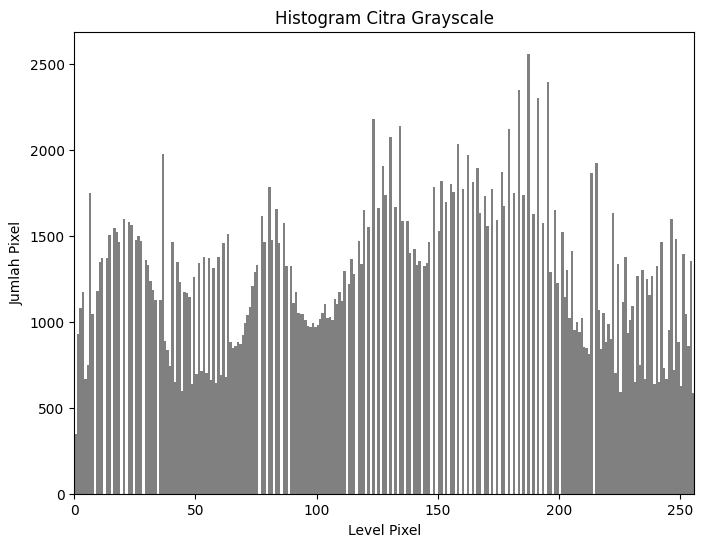

In [27]:
# Sesudah Equalization
histogram_gray(equalized_img)

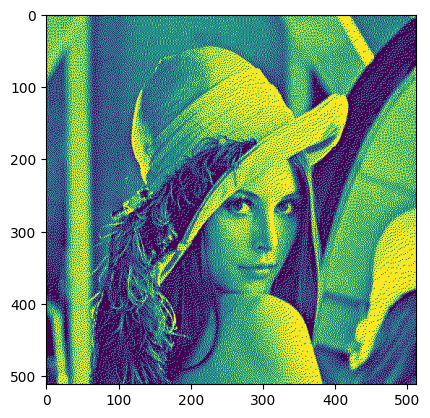

In [28]:
# Floyd-Steinberg Dithering

def floyd_steinberg_dithering_gray(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      # Jarak pixel tetangga
      pixel_old = image[y, x]

      # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
      pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

      image[y, x] = pixel_new

      error = pixel_old - pixel_new

      # Lakukan untuk semua channel warna
      # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
      if x + 1 < lebar:
        image[y, x + 1] = threshold(image[y, x + 1] + error * 7/16)
      if y + 1 < tinggi:
        if x - 1 >= 0:
          image[y + 1, x - 1] = threshold(image[y + 1, x - 1] + error * 3/16)
        image[y + 1, x] = threshold(image[y + 1, x] + error * 5/16)
        if x + 1 < lebar:
          image[y + 1, x + 1] = threshold(image[y + 1, x + 1] + error * 1/16)

  return image

dithering_image = floyd_steinberg_dithering_gray(equalized_img)
plt.imshow(dithering_image)